In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1rxi as method
import plot_utils

In [2]:
chunk_size = 10

In [3]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size))
fname

'n_1r10i'

In [4]:
import rate
rate.setkey(1)

In [5]:
source = annotate.get_clean()

In [6]:
source = source.sample(frac=1, random_state=8)

In [7]:
await method.rate(source, chunk_size=chunk_size)

Request 1 of 423
Request 2 of 423
Request 3 of 423
Request 4 of 423
Request 5 of 423
Request 6 of 423
Request 7 of 423
Request 8 of 423
Request 9 of 423
Request 10 of 423
Request 11 of 423
Request 12 of 423
Request 13 of 423
Request 14 of 423
Request 15 of 423
Request 16 of 423
Request 17 of 423
Request 18 of 423
Request 19 of 423
Request 20 of 423
Request 21 of 423
Request 22 of 423
Request 23 of 423
Request 24 of 423
Request 25 of 423
Request 26 of 423
Request 27 of 423
Request 28 of 423
Request 29 of 423
Request 30 of 423
Request 31 of 423
Request 32 of 423
Request 33 of 423
Request 34 of 423
Request 35 of 423
Request 36 of 423
Request 37 of 423
Request 38 of 423
Request 39 of 423
Request 40 of 423
Request 41 of 423
Request 42 of 423
Request 43 of 423
Request 44 of 423
Request 45 of 423
Request 46 of 423
Request 47 of 423
Request 48 of 423
Request 49 of 423
Request 50 of 423
Request 51 of 423
Request 52 of 423
Request 53 of 423
Request 54 of 423
Request 55 of 423
Request 56 of 423
R

In [8]:
source.to_excel(f'gpt-ratings/{fname}-turbo.xlsx')

In [9]:
source = pd.read_excel(f'gpt-ratings/{fname}-turbo.xlsx').set_index('Unnamed: 0')

In [10]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.5991949138059859, pvalue=5.61812565821134e-120),
 'feasibility': SignificanceResult(statistic=0.5639897445744683, pvalue=1.5216355813203003e-103),
 'value': SignificanceResult(statistic=0.2293695519664871, pvalue=4.725107352317521e-16)}

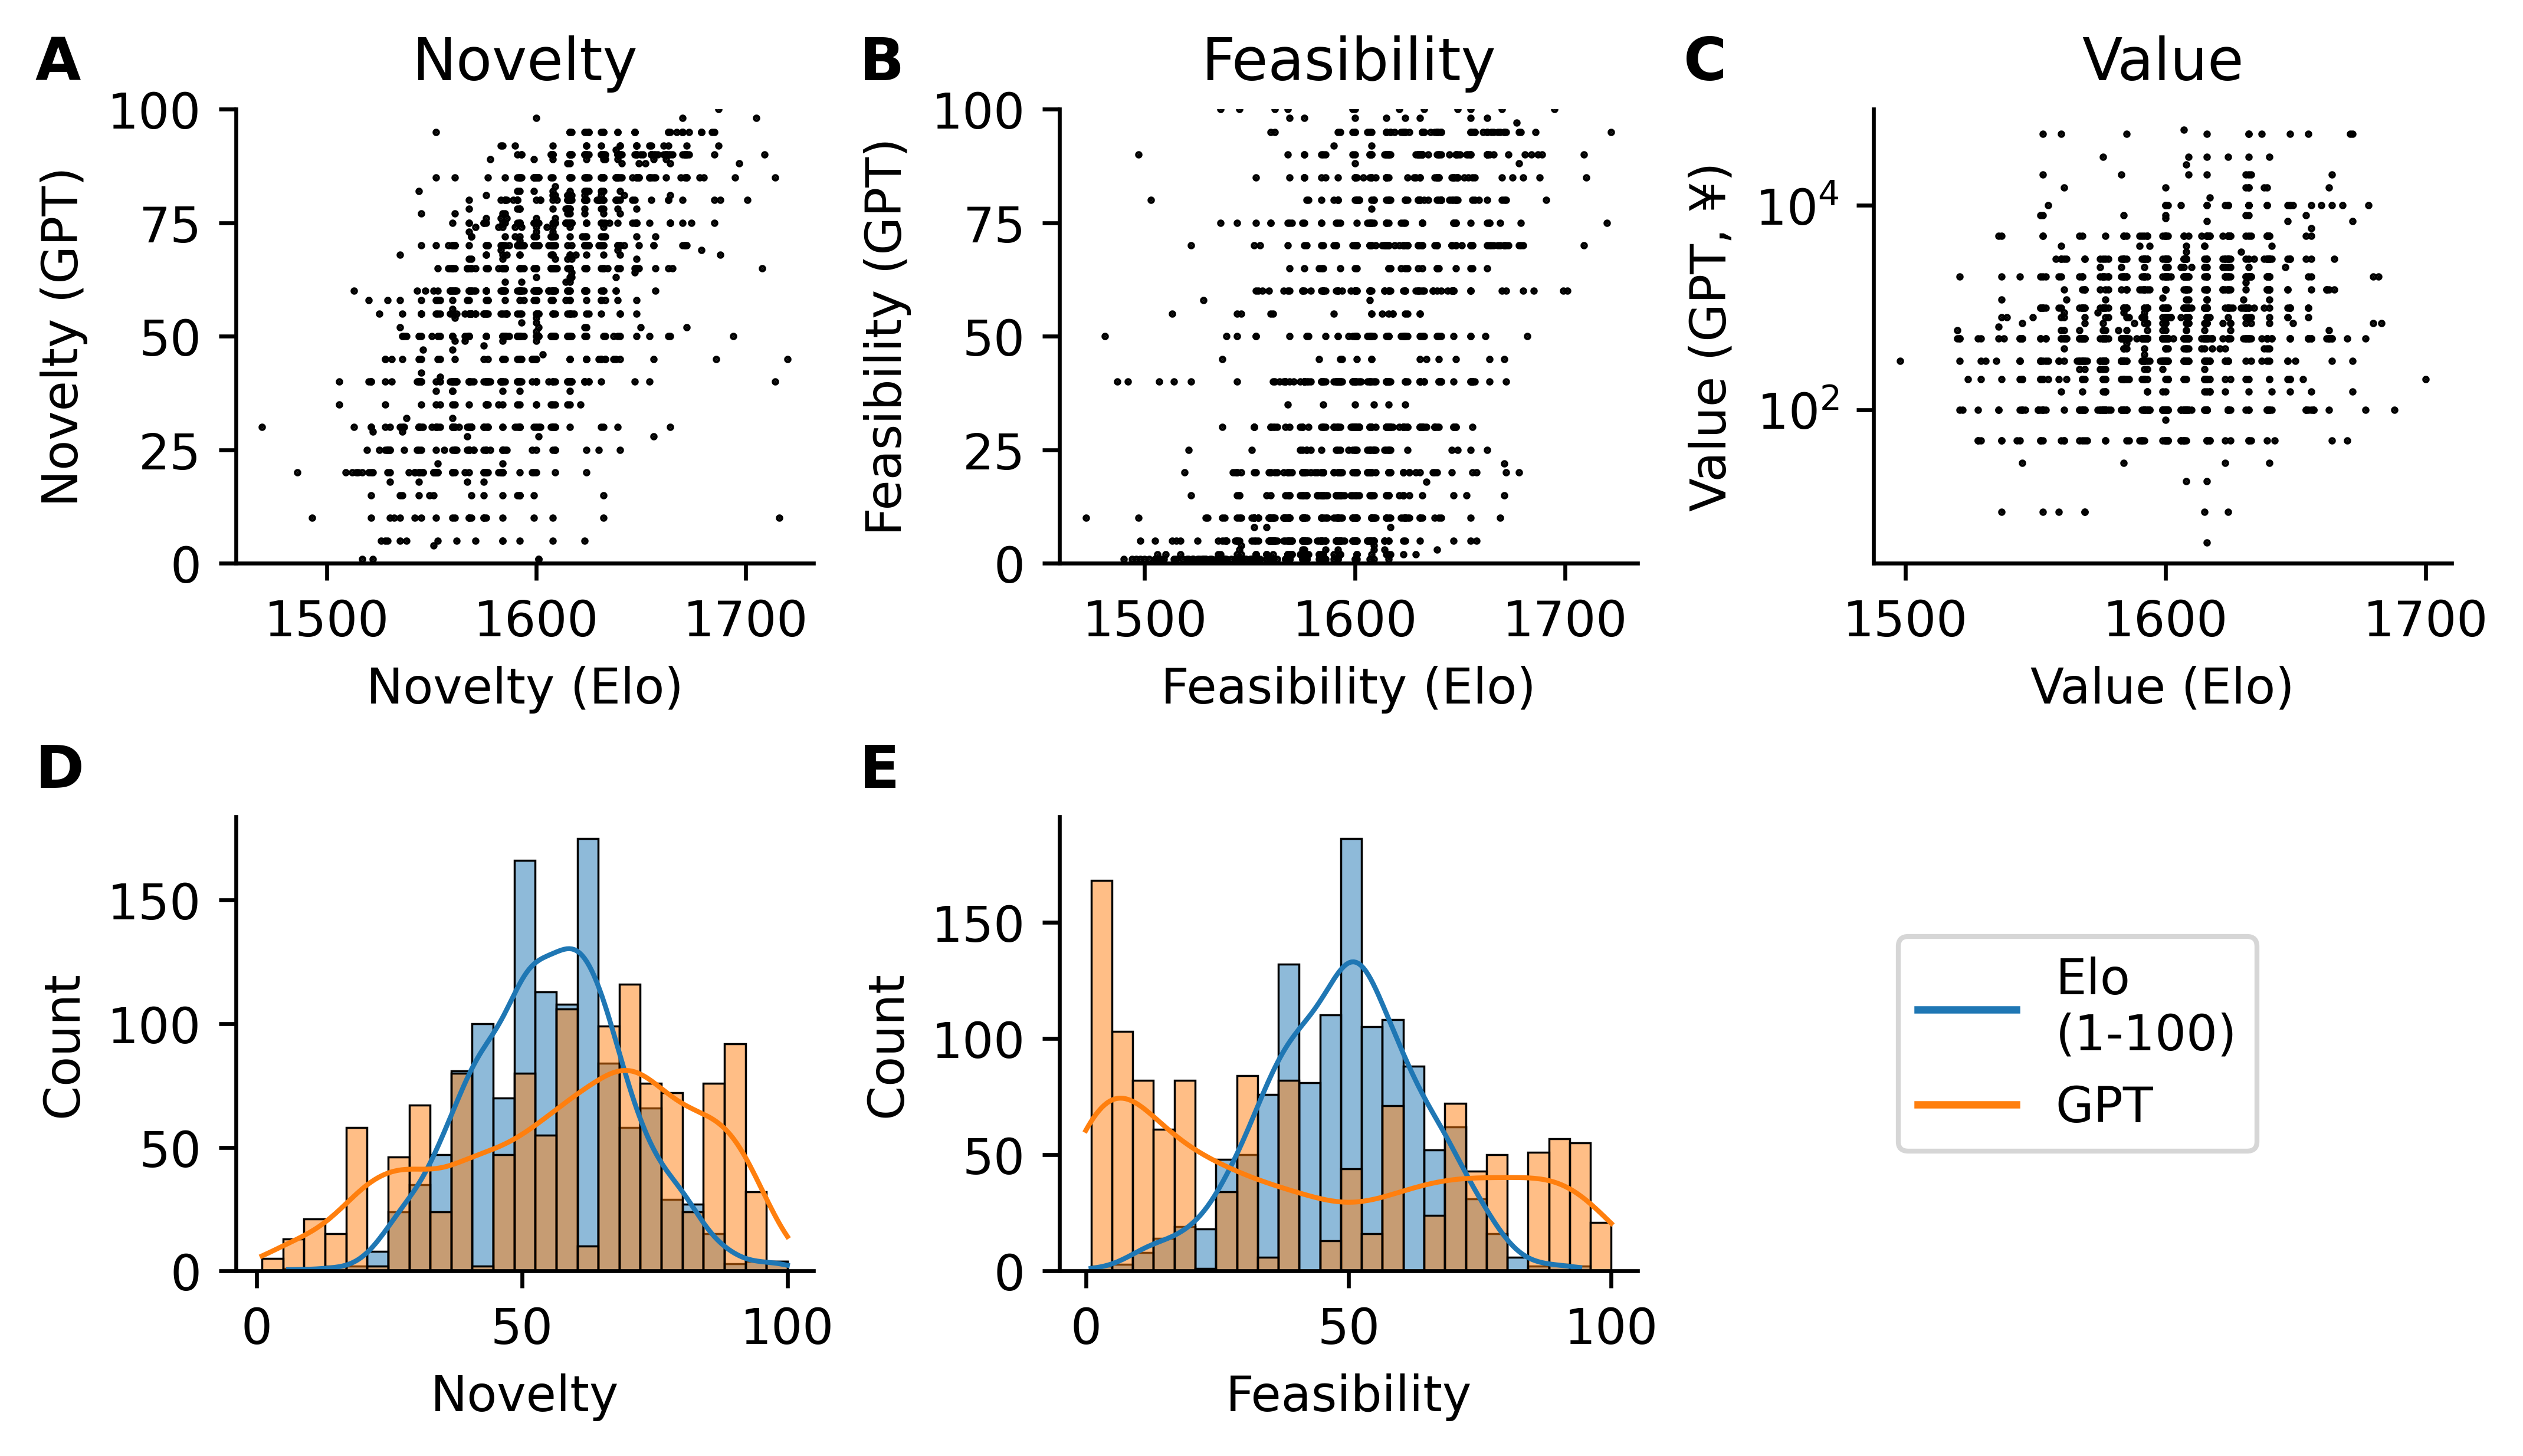

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='GPT')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

# plt.savefig(f'Figure_2.{fname}.pdf')

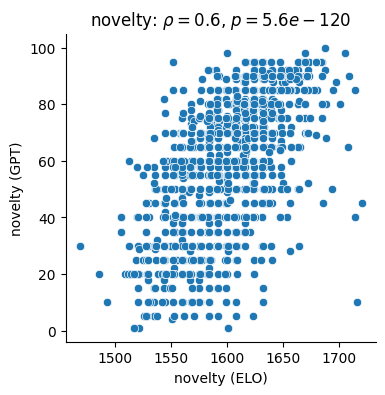

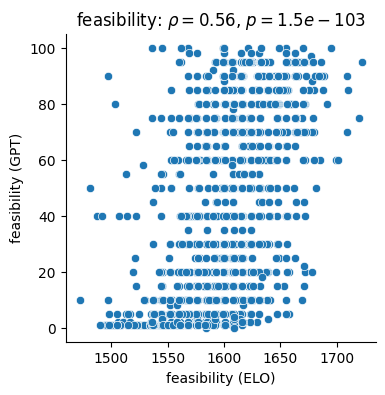

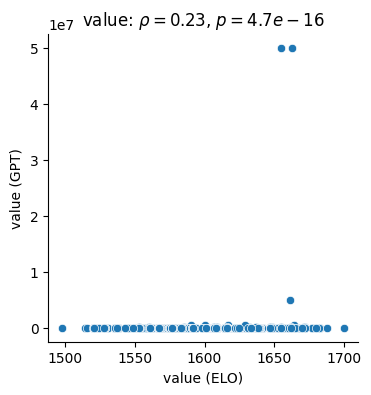

In [12]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (GPT)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

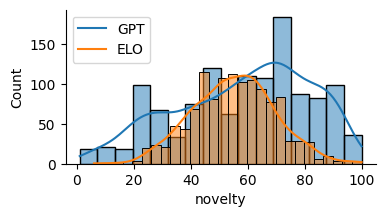

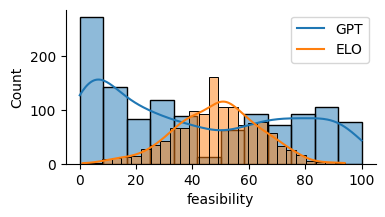

In [13]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='GPT')
    plt.plot([], label='ELO')
    plt.legend()

In [14]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

ハンカチ
ラーメン
Given health and practicality concerns, this idea has negative commercial value and could detract from the value of the food item.



In [15]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

裁縫針
雇う
500000
1. 雇う (Using sewing needles as employment tools)
Employment tools here could mean tools used in the creation of employment opportunities, possibly in the textile industry. Similar tools or services in the textile industry might range widely in value.

コルク
家の建築
500000
10. コルクを使った家の建築のアイデア
コルクを建築材料として使用することは、断熱性や耐久性を提供し、高価な市場ニッチを対象とする可能性がある。

レンガ
教室
50000000
8. レンガを教室の建材として使用。
建材としてのレンガは一般的に使用され、価格は建築規模によって数百万円から数十億円。教室建設には高い価値がある。

ストロー
食料
500000
1. ストローを食料として使用するアイデア
食料としてのストローは、食品業界での新しい食材や食品パッケージング材料としての可能性を持つ。既存の食品や食品パッケージング材料の市場価値を考慮すると、中程度の商業価値があると推定される。

レンガ
家
50000000
8. レンガで家を建てる
レンガを使用して家を建てるアイデアは、既存の建築材料としてのレンガの使用と一致し、家の建築には数百万円から数億円がかかる。

塩
電波
500000
9. 使用塩改善电波传输
电波传输技术的改进可能带来巨大的商业价值，但具体取决于实际应用和效果。

ストロー
ベッド
200000
8. ストローをベッドとして使用するアイデア
ベッドとしてのストローは、大量に使用し、適切な構造を考える必要があるが、既存の安価なエアーベッドや簡易ベッドと比較しても、限定的な市場価値があると推定される。

レンガ
トイレ
500000
9. レンガをトイレとして使用
レンガをトイレの建材として使用するアイデアは、耐久性やデザイン性を考慮したトイレ建設において一定の価値がある。建築材料としての価格や施工費用を考慮すると、数十万円の価値があると見積もることができる。

コルク
住居
5000000

Text(0.5, 1.0, 'value: $\\rho = 0.23$, $p = 2e-14$')

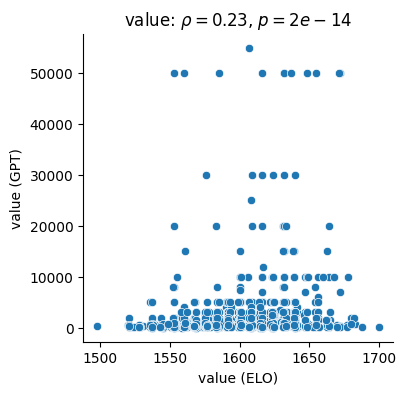

In [16]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (GPT)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [17]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

3. Using a ballpoint pen as a refrigerator.
This idea is highly novel due to the significant difference between the usual function of a pen and the complex functionality of a refrigerator.
{"novelty": 90}
